#Práctica 3: Análisis de Series Temporales
###*Técnicas Avanzadas de Análisis de Datos*, Máster Universitario en Ciberseguridad e Inteligencia de Datos.
####*Alba Cruz Torres*

## Accidentes de avión y víctimas mortales desde 1908.
Explicar de qué trata la práctica, qué se va a realizar, qué se pretende conseguir. Contestar estas preguntas y más:
- ¿Cómo han evolucionado a lo largo del tiempo?
- ¿Tienen estacionalidad?
- ¿Tienen que ver con la zona?
- ¿Qué aerolíneas han sufrido más accidentes de avión? ¿Cuáles han causado más víctimas mortales?


### Importación de paquetes

En primer lugar, se procede a la instalación e importación de paquetes y librerías.

In [1]:
!pip3 install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 8.4 MB/s 
     |████████████████████████████████| 9.8 MB 40.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [103]:
#importing the libraries and data
import io
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import ADFTest
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Carga de datos

El siguiente paso es el de cargar el conjunto de datos con el que se va a trabajar. En este caso, dicho conjunto de datos es el denominado "*Airplane_Crashes_and_Fatalities_Since_1908*", en el que se encuentra información de los accidentes de avión ocurridos desde 1908 hasta 2009, donde se detallan datos sobre el número de víctimas causadas, la compañía, el tipo de avión, el número de pasajeros a bordo o un resumen del accidente.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Airplane_Crashes_and_Fatalities_Since_1908.csv to Airplane_Crashes_and_Fatalities_Since_1908.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['Airplane_Crashes_and_Fatalities_Since_1908.csv']))

### Análisis Exploratorio

A continuación, se procede a realizar un análisis exploratorio del conjunto de datos, en el que se estudiará la estructura de los datos, se analizarán los valores nulos o perdidos y cómo manejarlos y se hará una representación gráfica de los datos que permita entender qué información aportan y resolver algunas de las preguntas a las que se desea dar respuesta.

#### Estructura de los datos

Como se puede ver a continuación, el *dataset* está formado por 13 columnas que contienen información relativa al accidente:

- *Date*: Fecha
- *Time*: Hora local
- *Location*: Lugar del accidente
- *Operator*: Operador o aerolínea del vuelo
- *Flight #*: Número de vuelo
- *Route*: Ruta completa o parcial realizada hasta el momento del accidente
- *Type*: Tipo de aeronave
- *Registration*: Registro ICAO de la aeronave
- *cn/In*: Número de serie o construcción / Número de fuselaje
- *Aboard*: Número de pasajeros y tripulación a bordo
- *Fatalities*: Número de víctimas mortales
- *Ground*: Número de fallecidos en tierra
- *Summary*: Breve descripción del accidente y causa si es conocida

In [5]:
df.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


Para poder ver el resumen del accidente entero, se ejecuta el siguiente comando que permite su representación completa.

In [6]:
pd.set_option('display.max_colwidth', -1)

In [7]:
df.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge who was a passenger. This was the first recorded airplane fatality in history. One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft. Orville Wright suffered broken ribs, pelvis and a leg. Selfridge suffered a crushed skull and died a short time later."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,"First U.S. dirigible Akron exploded just offshore at an altitude of 1,000 ft. during a test flight."
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,"The first fatal airplane accident in Canada occurred when American barnstormer, John M. Bryant, California aviator was killed."
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encountered a severe downdraft crashing 20 miles north of Helgoland Island into the sea. The ship broke in two and the control car immediately sank drowning its occupants.
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,"Hydrogen gas which was being vented was sucked into the forward engine and ignited causing the airship to explode and burn at 3,000 ft.."


Con el siguiente comando se puede hacer una observación de los valores medios, máximos y mínimos de las variables numéricas en las que se va a hacer hincapié a lo largo de este proyecto. Por tanto, se puede ver que la media de los pasajeros a bordo en los accidentes, contando con la tripulación, es de 27.55 personas por aeronave. Además, se muestra el máximo y el mínimo de los pasajeros a bordo, de las víctimas mortales del accidente y de los fallecidos en tierra después del accidente. Como se puede observar, los valores máximos son bastante críticos y preocupantes, pues se trata de 583 víctimas mortales y de 2750 fallecidos en tierra.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Aboard,5246.0,27.554518,43.076711,0.0,5.0,13.0,30.0,644.0
Fatalities,5256.0,20.068303,33.199952,0.0,3.0,9.0,23.0,583.0
Ground,5246.0,1.608845,53.987827,0.0,0.0,0.0,0.0,2750.0


Si se hace un análisis de los accidentes que dieron lugar a ese número de fallecidos tan alto, se tiene, en primer lugar, el ataque terrorista hacia las torres gemelas. Dicho ataque dio pie no solo al fallecimiento de los 175 pasajeros y tripulantes de los aviones en cuestión sino que también causó la muerte de 2750 civiles en tierra. CONTAR UN POCO DEL ATAQUE TERRORISTA 

In [9]:
df.loc[df['Ground'] == 2750.0]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
4803,09/11/2001,08:47,"New York City, New York",American Airlines,11,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,92.0,92.0,2750.0,"The aircraft was hijacked shortly after it left Logan International Airport in Boston. The hijackers took control of the aircraft and deliberately crashed it into the north tower of the World Trade Center between the 94th and 99th floors at approximately 450 mph. After 102 minutes, the building collapsed. It was one of four planes that were hijacked the same day."
4804,09/11/2001,09:03,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,65.0,65.0,2750.0,"The aircraft was hijacked shortly after it left Logan International Airport in Boston. The hijackers took control of the aircraft and deliberately crashed it into the south tower of the World Trade Center between the 78th and 84th floors at approximately 550 mph. After 56 minutes, the building collapsed. It was one of four planes that were hijacked the same day."


Por otro lado, se encuentra el accidente de avión que causó el mayor número de víctimas mortales contando tanto con pasajeros como con tripulación. Este accidente fue el ocurrido en 1977 en Tenerife, CONTAR UN POCO DEL ACCIDENTE

In [10]:
df.loc[df['Fatalities'] == 583.0]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
2963,03/27/1977,17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644.0,583.0,0.0,"Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay, both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames. KLM 234 + 14 crew, Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The Pan Am aircraft was named Clipper Victor. The KLM aircraft was named Rhine River."


#### Análisis de valores perdidos

Una vez comprendida la estructura del *dataset* y vistos algunos de sus valores máximos y sus causas, se procede al estudio de la cantidad de valores nulos encontrados en el conjunto de datos. El primer paso es el de saber cuántas instancias en total hay en el *dataset*, es decir, cuántos accidentes hay registrados. En este caso, se cuenta con 5268 accidentes aéreos, contabilizados desde 1908 hasta 2009.

In [11]:
len(df) 

5268

Lo siguiente que se debe hacer es contar la cantidad de valores nulos que se encuentran en el conjunto de datos por cada una de las columnas.

In [12]:
df.isnull().sum()

Date            0   
Time            2219
Location        20  
Operator        18  
Flight #        4199
Route           1706
Type            27  
Registration    335 
cn/In           1228
Aboard          22  
Fatalities      12  
Ground          22  
Summary         390 
dtype: int64

Como este proyecto se centra en el número de accidentes, junto con la cantidad de fallecidos y supervivientes, se hará hincapié en el manejo de los valores nulos encontrados en estas tres columnas concretas. Al poseer 5268 registros de accidentes y después de haber comprobado que solo faltan datos en 22, 12 y 22 registros relativos a los pasajeros a bordo, las víctimas mortales y los fallecidos en tierra, respectivamente, se ha decidido eliminar esas filas, puesto que se acaba teniendo como resultado una gran cantidad de registros para ser evaluados, en concreto 5236. De esta manera, se consigue que no haya valores nulos en ninguna de las columnas objetivo que se han elegido.

In [13]:
df = df.dropna(axis=0, subset=['Fatalities', 'Ground', 'Aboard'])

In [14]:
len(df) 

5236

In [15]:
df.isnull().sum()

Date            0   
Time            2190
Location        19  
Operator        18  
Flight #        4169
Route           1686
Type            25  
Registration    327 
cn/In           1209
Aboard          0   
Fatalities      0   
Ground          0   
Summary         382 
dtype: int64

#### Representación de datos en gráficas

A continuación, se procede a la representación gráfica de los datos almacenados en el *dataset* con el fin de comprender qué información aportan y qué preguntas se podrán resolver con dichos datos. Ya que se trata de una serie temporal, la fecha y hora del accidente se debe expresar como un *datetime*, es decir, con el siguiente formato: aaaa/mm/dd 00:00:00. Para ello, se ha hecho uso de la siguiente función, que convierte tanto la fecha como la hora a dicho formato y los une en la columna '*Time*'. Como se puede observar, el rango de fechas va desde el 17-09-1908 hasta el 08-06-2009. 

In [16]:
df['Time'] = df['Time'].replace(np.nan, '00:00') 
df['Time'] = df['Time'].str.replace('c: ', '')
df['Time'] = df['Time'].str.replace('c:', '')
df['Time'] = df['Time'].str.replace('c', '')
df['Time'] = df['Time'].str.replace('12\'20', '12:20')
df['Time'] = df['Time'].str.replace('18.40', '18:40')
df['Time'] = df['Time'].str.replace('0943', '09:43')
df['Time'] = df['Time'].str.replace('22\'08', '22:08')
df['Time'] = df['Time'].str.replace('114:20', '00:00') 

df['Time'] = df['Date'] + ' ' + df['Time'] 
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
df['Time'] = df['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(df.Time.min()) + ' to ' + str(df.Time.max()))

df.Operator = df.Operator.str.upper() #just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


In [17]:
df.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge who was a passenger. This was the first recorded airplane fatality in history. One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft. Orville Wright suffered broken ribs, pelvis and a leg. Selfridge suffered a crushed skull and died a short time later."
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,"First U.S. dirigible Akron exploded just offshore at an altitude of 1,000 ft. during a test flight."
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,"The first fatal airplane accident in Canada occurred when American barnstormer, John M. Bryant, California aviator was killed."
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encountered a severe downdraft crashing 20 miles north of Helgoland Island into the sea. The ship broke in two and the control car immediately sank drowning its occupants.
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,"Hydrogen gas which was being vented was sucked into the forward engine and ignited causing the airship to explode and burn at 3,000 ft.."


Ahora, se va a representar de manera gráfica el número de accidentes por año. Con dicha gráfica, se puede observar el flujo de los accidentes aéreos según los años en los que se registraron. Entre los años 60 y 80 se registró el mayor número de accidentes.

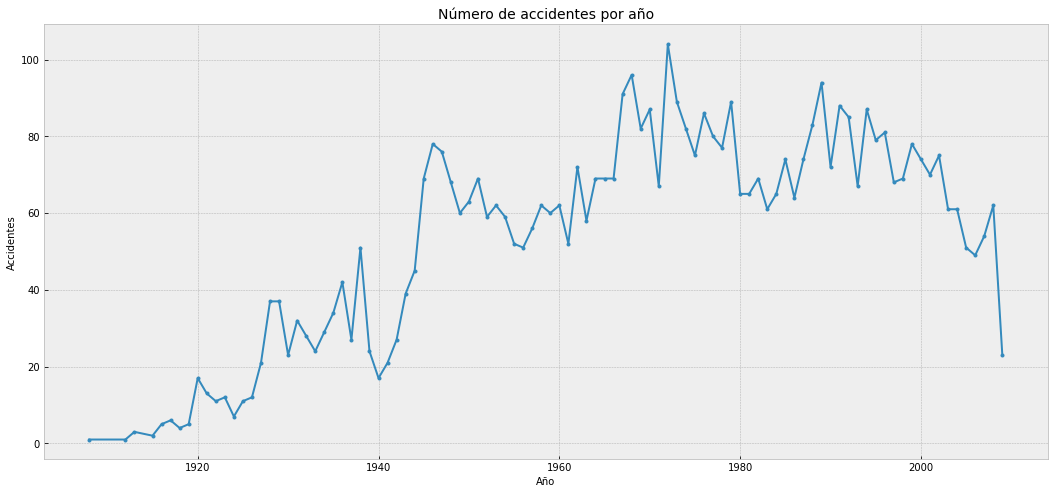

In [82]:
year_count = df.groupby(df.Time.dt.year)[['Date']].count() 
year_count = year_count.rename(columns={"Date": "Count"})

plt.figure(figsize=(18,8))
plt.style.use('bmh')
plt.plot(year_count.index, 'Count', data=year_count, marker = ".")
plt.xlabel('Año', fontsize=10)
plt.ylabel('Accidentes', fontsize=10)
plt.title('Número de accidentes por año', loc='Center', fontsize=14)
plt.show()

Como se puede observar a continuación, el año en que hubo un mayor número de accidentes fue el año 1972 con 104 accidentes, seguido del año 1968 en el que sucedieron 96 accidentes.

In [83]:
temp = year_count.sort_values(by='Count', ascending=False)
temp.head()

,Count
Time,
1972,104
1968,96
1989,94
1967,91
1979,89


Asimismo, se ha decidido hacer unos gráficos de barras en los que se muestran cuántos accidentes han sucedido según el mes, el día y la hora. En el gráfico siguiente es observable que el mes en el que han ocurrido más accidentes ha sido diciembre. Por otro lado, los accidentes registrados han sucedido más veces en día jueves. Finalmente, la hora en la que se han registrado más accidentes ha sido en torno a las 9:00 am.

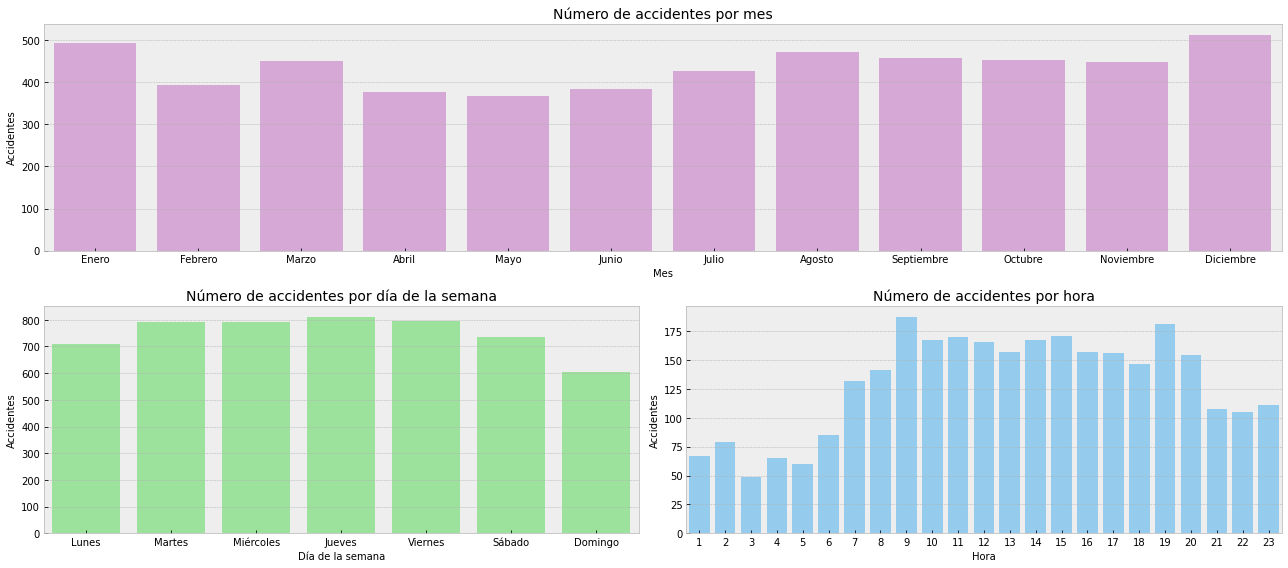

In [31]:
gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(18,8))
plt.style.use('seaborn-muted')
ax = pl.subplot(gs[0, :])
sns.barplot(df.groupby(df.Time.dt.month)[['Date']].count().index, 'Date', data=df.groupby(df.Time.dt.month)[['Date']].count(), color ='plum', linewidth=2)
plt.xticks(df.groupby(df.Time.dt.month)[['Date']].count().index-1, ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.xlabel('Mes', fontsize=10)
plt.ylabel('Accidentes', fontsize=10)
plt.title('Número de accidentes por mes', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 0])
sns.barplot(df.groupby(df.Time.dt.weekday)[['Date']].count().index, 'Date', data=df.groupby(df.Time.dt.weekday)[['Date']].count(), color ='lightgreen', linewidth=2)
plt.xticks(df.groupby(df.Time.dt.weekday)[['Date']].count().index, ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.xlabel('Día de la semana', fontsize=10)
plt.ylabel('Accidentes', fontsize=10)
plt.title('Número de accidentes por día de la semana', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 1])
sns.barplot(df[df.Time.dt.hour != 0].groupby(df.Time.dt.hour)[['Date']].count().index, 'Date', data=df[df.Time.dt.hour != 0].groupby(df.Time.dt.hour)[['Date']].count(), color ='lightskyblue', linewidth=2) #color ='lightskyblue'
plt.xlabel('Hora', fontsize=10)
plt.ylabel('Accidentes', fontsize=10)
plt.title('Número de accidentes por hora', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()


El siguiente paso es el de contabilizar y representar gráficamente el número de fallecidos y supervivientes frente a los pasajeros y tripulación a bordo de la aeronave. Como se puede observar en la imagen siguiente, en la totalidad de los accidentes aéreos registrados se muestra que solo un 27.1% de los pasajeros sobrevivieron a los accidentes, mientras que el 72.9% restante fallecieron.

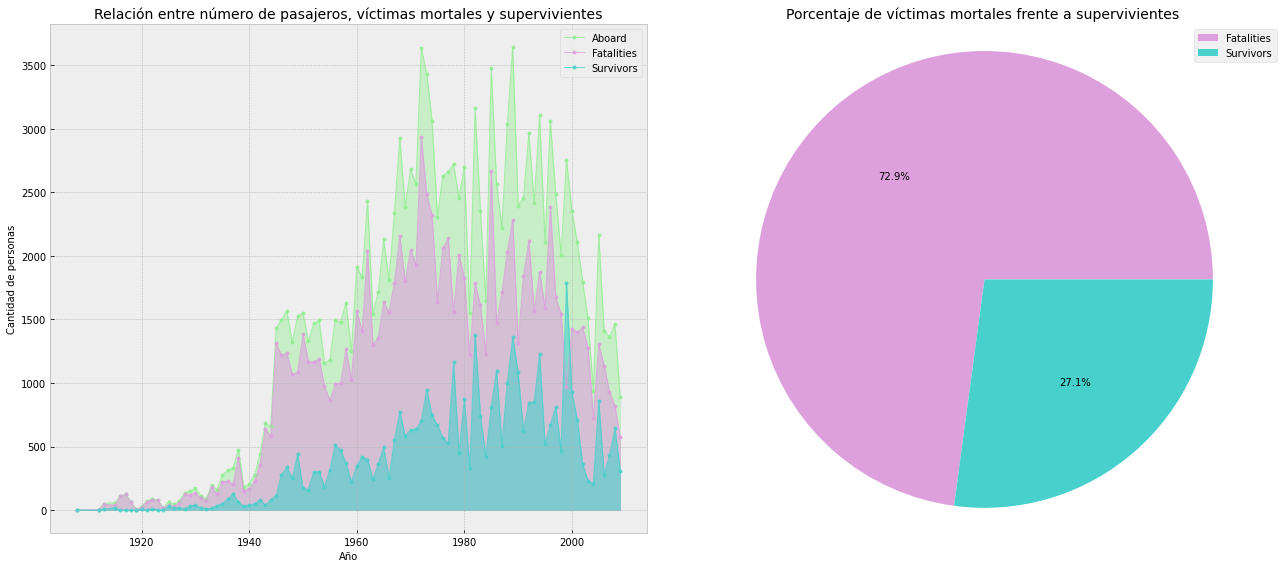

In [44]:
Accidents = df.groupby(df.Time.dt.year).sum()
Accidents['Survivors'] = Accidents['Aboard'] - Accidents['Fatalities']

plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
plt.fill_between(Accidents.index, 'Aboard', data=Accidents, color="lightgreen", alpha=0.4)
plt.plot(Accidents.index, 'Aboard', data=Accidents, marker = ".", color="lightgreen", alpha=0.8, linewidth=1)
plt.fill_between(Accidents.index, 'Fatalities', data=Accidents, color="plum", alpha=0.6)
plt.plot(Accidents.index, 'Fatalities', data=Accidents, color="plum", marker = ".", alpha=0.8, linewidth=1)
plt.fill_between(Accidents.index, 'Survivors', data=Accidents, color="mediumturquoise", alpha=0.6)
plt.plot(Accidents.index, 'Survivors', data=Accidents, color="mediumturquoise", marker = ".", alpha=0.8, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Cantidad de personas', fontsize=10)
plt.title('Relación entre número de pasajeros, víctimas mortales y supervivientes', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
Aboard = df.Aboard.sum()
Fatalities = df.Fatalities.sum()
Survivors = Aboard - Fatalities

y = np.array([Fatalities, Survivors])
mylabels = ["Fatalities", "Survivors"]
colors = ["plum", "mediumturquoise"]
plt.pie(y, autopct='%1.1f%%', colors=colors)
plt.legend(labels=mylabels)
plt.axis('equal')
plt.title('Porcentaje de víctimas mortales frente a supervivientes', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

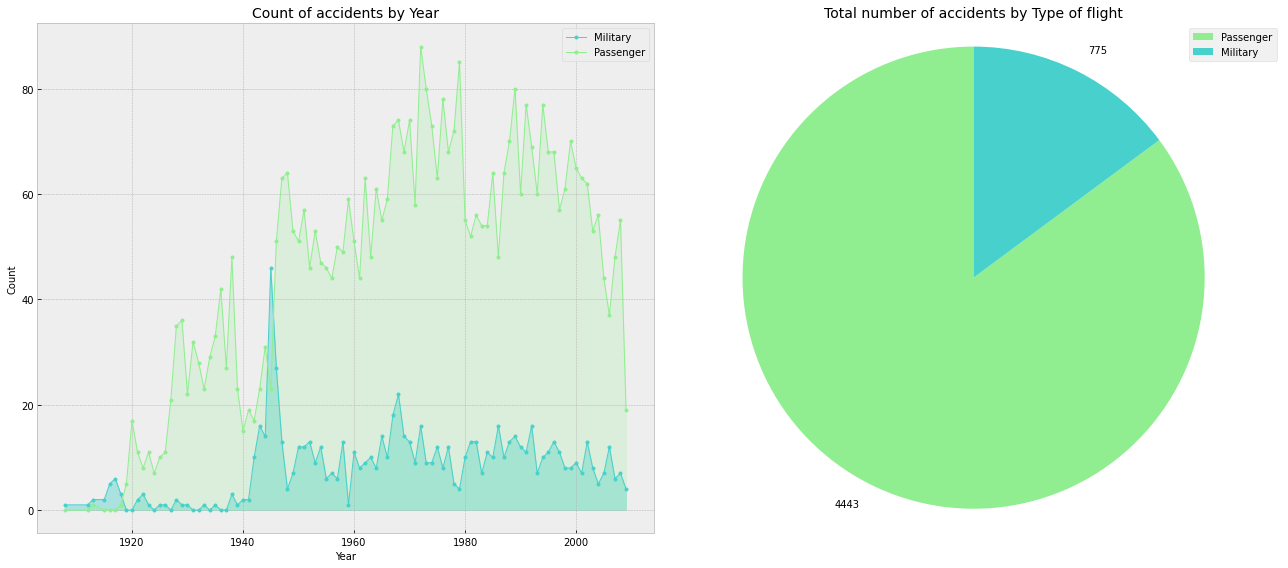

In [47]:
Temp = df.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = df.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
plt.fill_between(Temp2.index, 'Military', data=Temp2, color="mediumturquoise", alpha=0.4)
plt.plot(Temp2.index, 'Military', data=Temp2, color='mediumturquoise', marker = ".", linewidth=1)
plt.fill_between(Temp2.index, 'Passenger', data=Temp2, color="lightgreen", alpha=0.2)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='lightgreen', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)

colors = ['lightgreen', 'mediumturquoise']
plt.subplot(1, 2, 2)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

Ahora, se procede a visualizar la cantidad de accidentes aéreos causados por cada compañía. Al tratarse de una gran cantidad de ellas, se ha decidido evaluar el top 10, puesto que se tiene especial interés en las que han causado mayores números de accidentes y fallecimientos. De esta manera, se puede observar que la aerolínea con más accidentes a su espalda es la llamada AEROFLOT con un total de 179 accidentes.

                                 Count
Operator                              
AEROFLOT                         179  
MILITARY - U.S. AIR FORCE        174  
AIR FRANCE                       67   
DEUTSCHE LUFTHANSA               65   
AIR TAXI                         48   
UNITED AIR LINES                 43   
MILITARY - U.S. ARMY AIR FORCES  43   
PAN AMERICAN WORLD AIRWAYS       40   
AMERICAN AIRLINES                36   
MILITARY - U.S. NAVY             36    



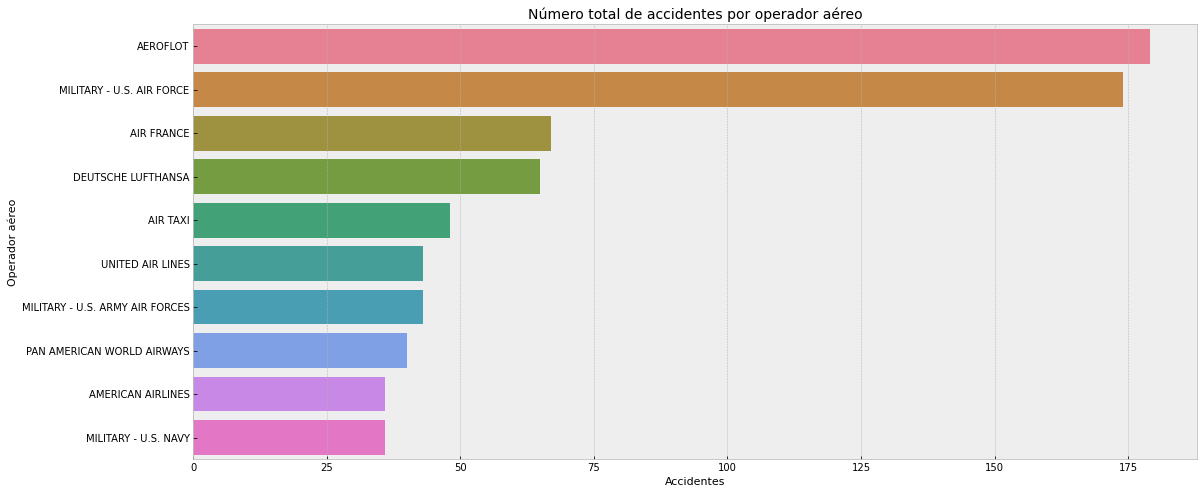

In [54]:
total_acc_by_op = df.groupby('Operator')[['Operator']].count()
total_acc_by_op = total_acc_by_op.rename(columns={"Operator": "Count"})
total_acc_by_op = total_acc_by_op.sort_values(by='Count', ascending=False).head(10)
print(total_acc_by_op, "\n")

plt.figure(figsize=(18,8))
sns.barplot(y=total_acc_by_op.index, x="Count", data=total_acc_by_op, palette="husl", orient='h')
plt.xlabel('Accidentes', fontsize=11)
plt.ylabel('Operador aéreo', fontsize=11)
plt.title('Número total de accidentes por operador aéreo', loc='Center', fontsize=14)
plt.show()

Por otro lado, se procede a comprobar cuál de las aerolíneas ha causado más víctimas mortales en total a lo largo de los años de este estudio. En este caso, también es la compañía AEROFLOT, lo cual tiene sentido, puesto que, como se vio en el gráfico anterior, es la compañía que cuenta con más accidentes aéreos causados. Por tanto, en el gráfico siguioente se muestra que dicha compañía causó el fallecimiento de 7156 personas.

                                 Fatalities
Operator                                   
AEROFLOT                         7156.0    
MILITARY - U.S. AIR FORCE        3688.0    
AIR FRANCE                       1729.0    
AMERICAN AIRLINES                1421.0    
PAN AMERICAN WORLD AIRWAYS       1301.0    
MILITARY - U.S. ARMY AIR FORCES  1070.0    
UNITED AIR LINES                 1017.0    
AVIANCA                          945.0     
TURKISH AIRLINES (THY)           891.0     
INDIAN AIRLINES                  863.0      



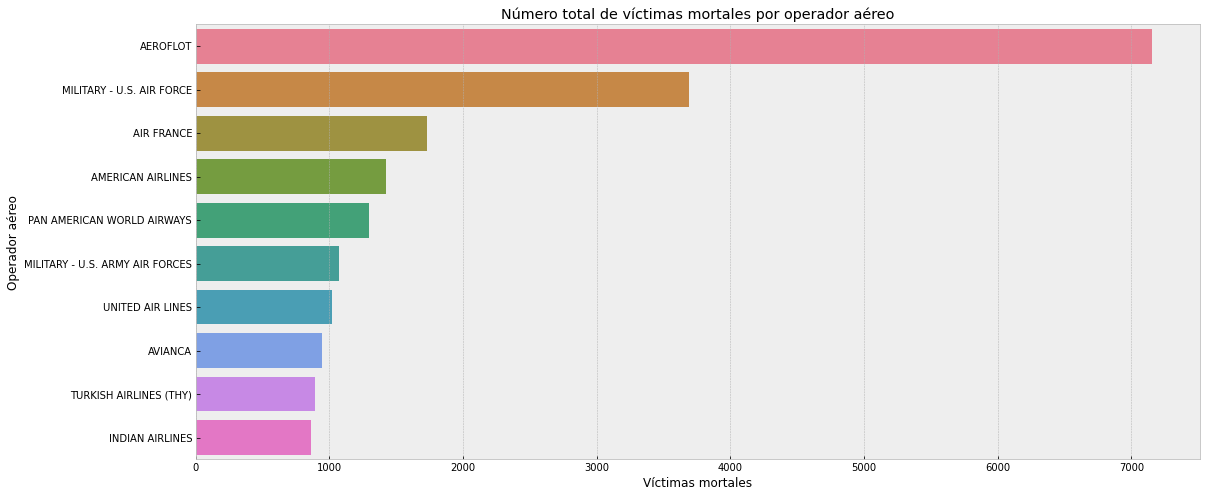

In [69]:
total_fat_by_op = df.groupby('Operator')[['Fatalities']].sum() 
total_fat_by_op = total_fat_by_op.rename(columns={"Operator": "Total Death"})
total_fat_by_op = total_fat_by_op.sort_values(by='Fatalities', ascending=False).head(10)
print(total_fat_by_op, "\n")

plt.figure(figsize=(18, 8))
sns.barplot(y=total_fat_by_op.index, x="Fatalities", data=total_fat_by_op, palette="husl")
plt.xlabel('Víctimas mortales')
plt.ylabel('Operador aéreo')
plt.title('Número total de víctimas mortales por operador aéreo')
plt.show()

A continuación, se hace un desgloce del número de accidentes por año causados por esta aerolínea en concreto. En la representación gráfica siguiente se ve perfectamente que en torno a la década de los 70-80 fue la más crítica para la compañía AEROFLOT, pues solo en el año 1973 tuvieron 15 accidentes aéreos.

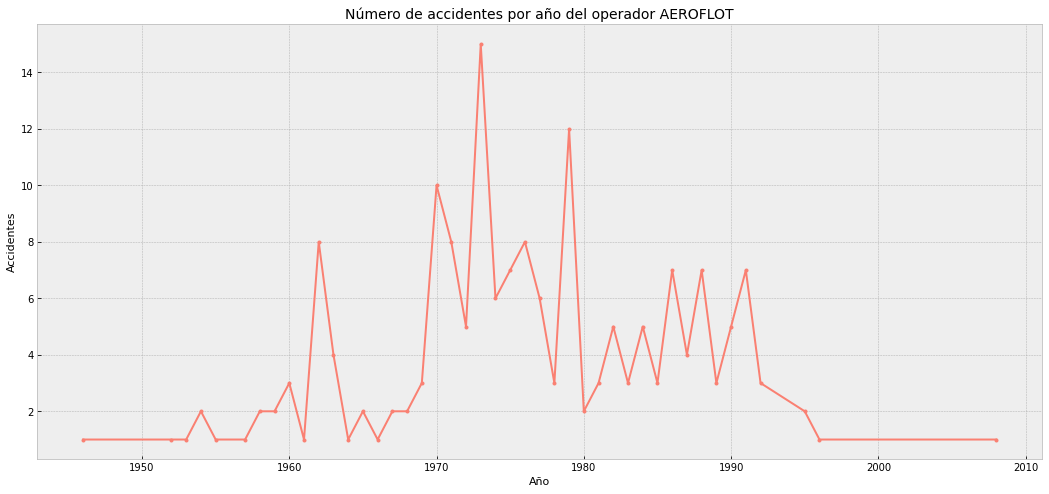

In [63]:
Aeroflot = df[df.Operator == 'AEROFLOT']

count_by_year_aeroflot = Aeroflot.groupby(df.Time.dt.year)[['Date']].count()
count_by_year_aeroflot = count_by_year_aeroflot.rename(columns={"Date": "Count"})

plt.figure(figsize=(18,8))
plt.plot(count_by_year_aeroflot.index, 'Count', data=count_by_year_aeroflot, marker='.', color='salmon')
plt.xlabel('Año', fontsize=11)
plt.ylabel('Accidentes', fontsize=11)
plt.title('Número de accidentes por año del operador AEROFLOT', loc='Center', fontsize=14)
plt.show()

In [62]:
temp = count_by_year_aeroflot.sort_values(by='Count', ascending=False)
temp.head()

,Count
Time,
1973,15
1979,12
1970,10
1976,8
1971,8


Otro de los datos que se ha tenido en cuenta para la representación gráfica de la información ha sido el del tipo de aeronave con la que sucedió el accidente, de manera que se pueda saber si ese modelo de aeronave resultó ser un modelo fallido o el accidente estuvo más relacionado con la organizaicón y manejo de la tripulación. Como se puede observar a continuación, el modelo de aeronave con el que sucedieron más accidentes fue el "*Douglas DC-3*" con 332 accidentes a sus espaldas.

                                          Count
Type                                           
Douglas DC-3                              332  
de Havilland Canada DHC-6 Twin Otter 300  81   
Douglas C-47A                             74   
Douglas C-47                              61   
Douglas DC-4                              40   
Yakovlev YAK-40                           37   
Antonov AN-26                             36   
Junkers JU-52/3m                          32   
Douglas C-47B                             29   
Douglas DC-6B                             27    



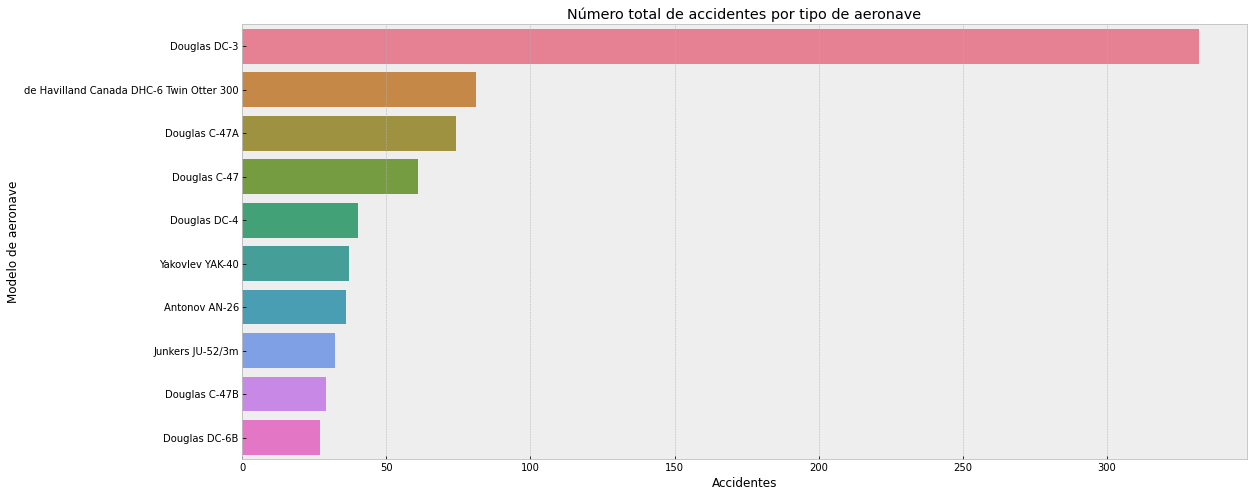

In [60]:
total_acc_by_type = df.groupby('Type')[['Type']].count()
total_acc_by_type = total_acc_by_type.rename(columns={"Type": "Count"})
total_acc_by_type = total_acc_by_type.sort_values(by='Count', ascending=False).head(10)
print(total_acc_by_type, "\n")

plt.figure(figsize=(18, 8))
sns.barplot(y=total_acc_by_type.index, x="Count", data=total_acc_by_type, palette="husl")
plt.xlabel('Accidentes')
plt.ylabel('Modelo de aeronave')
plt.title('Número total de accidentes por tipo de aeronave')
plt.show()

Una vez descubierto cuál es el modelo de avión que cuenta con más accidentes a sus espaldas, se procede a mostrar los sumarios de cada uno de los accidentes para comprobar si se trata de un modelo fallido o de otra causa. Según algunas fuentes en Internet y los sumarios, se puede concluir que el modelo no presentaba ningún fallo de fábrica, sino que resultó ser una gran revolución en el transporte aéreo de pasajeros en los años 1930 y 1940, dando lugar a que muchas compañías compraran un gran número de aviones de este modelo.

In [65]:
df[(df['Type']=='Douglas DC-3')][['Type','Summary']].head(10)

,Type,Summary
445,Douglas DC-3,"Bronislaw Hubermann, celibrated Polish violinist was sightly injured."
446,Douglas DC-3,"The plane crashed into the side of a mountain (Humpy Ridge) in level flight at 10,000 ft. under adverse weather conditions. Staticonditions encountered in the last portion of the flight which rendered the reception of radio range signals unintelligible. The continuation of the flight into mountainous country at an altitude below of higher mountains without the aid of ground visibility or radio signals to definitely identify position. A change in the weather caused by the approach of an unpredicted cold front."
495,Douglas DC-3,The aircraft flew into the ground during approach in poor visibility. The first officer was commander of the military flying school Soesterberg.
534,Douglas DC-3,Crashed and burned during a government test flight
539,Douglas DC-3,Crashed into a mountainous area during a hail storm.
540,Douglas DC-3,"The aircraft was flying through a thunderstorm in turbulence when the it nosed over and plunged to earth near Short Hill Mountain. Disabling of the pilots by a severe lightning discharge in the immediate neighborhood of the airplane, with resulting loss of control. With limited accident investigation tools at the time, the most likely cause was the plane flying into windshear. U.S. Senator Ernest Lundeen from Minnesota killed."
542,Douglas DC-3,Weather related.
543,Douglas DC-3,"The aircraft crashed into Bountiful Peak in the Wasatch Mountains, during a snowstorm, 3 nm NE of Centerville. The failure of the communications operators at Tintic, Plymouth, and Salt Lake City, Utah, whose duty it was to monitor the range, to detect its malfunctioning and immediately notify those concerned and the failure of the pilot to follow to the fullest extent established radio range technique in accordance with the requirements of the procedure established by United and approved by the Civil Aeronautics Administration."
553,Douglas DC-3,"The aircraft crashed into a hill in pine woods, near Chandler Field, while attempting to make an instrument landing approach in rain and fog. The failure of the captain in charge of the flight to exercise the proper degree of fare by not checking his altimeters to determine whether both were correctly set and properly functioning before commencing his landing approach. A substantial contributing factor was the absence of an established uniform cockpit procedure on Eastern Air Lines by which both the captain and co-pilot are required to make a complete check of the controls and instruments during landing operations. Captain Edward Rickenbacker, President of Eastern Air Lines, survived the crash."
556,Douglas DC-3,Crashed during takeoff.


Por último, se estudia la cantidad de accidentes y víctimas mortales según la zona en la que ocurrieron. Si se hace hincapié en el número de accidentes, se ve claramente que la mayoría de ellos, en concreto 15, ocurrieron en Moscú, Rusia.

                        Count
Location                     
Moscow, Russia          15   
Sao Paulo, Brazil       15   
Rio de Janeiro, Brazil  14   
Anchorage, Alaska       13   
Manila, Philippines     13   
Bogota, Colombia        13   
Cairo, Egypt            12   
New York, New York      12   
Chicago, Illinois       11   
Tehran, Iran            9    
AtlantiOcean            9    
Near Moscow, Russia     9    
Paris, France           8    
Ankara, Turkey          8    
Denver, Colorado        8     



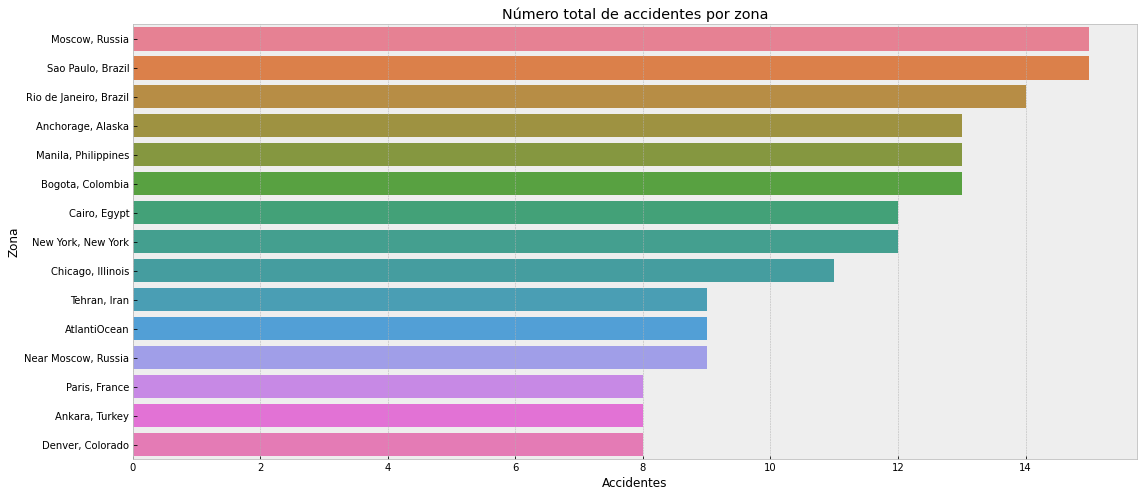

In [68]:
total_acc_by_zone = df.groupby('Location')[['Location']].count()
total_acc_by_zone = total_acc_by_zone.rename(columns={"Location": "Count"})
total_acc_by_zone = total_acc_by_zone.sort_values(by='Count', ascending=False).head(15)
print(total_acc_by_zone, "\n")

plt.figure(figsize=(18, 8))
sns.barplot(y=total_acc_by_zone.index, x="Count", data=total_acc_by_zone, palette="husl")
plt.xlabel('Accidentes')
plt.ylabel('Zona')
plt.title('Número total de accidentes por zona')
plt.show()

Sin embargo, si se centra el estudio en el número de víctimas mortales por zona, el lugar que acumula más fallecidos es Tenerife, puesto que, como se comentó anteriormente, en el gran accidente ocurrido en el aeropuerto de Los Rodeos se contabilizó el mayor número de personas fallecidas.

                                         Fatalities
Location                                           
Tenerife, Canary Islands                 761.0     
Mt. Osutaka, near Ueno Village, Japan    520.0     
Moscow, Russia                           432.0     
Near Moscow, Russia                      364.0     
Sao Paulo, Brazil                        362.0     
Near Charkhidadri, India                 349.0     
Near Ermenonville, France                346.0     
AtlantiOcean, 110 miles West of Ireland  329.0     
Taipei, Taiwan                           328.0     
Near Riyadh, Saudi Arabia                301.0      



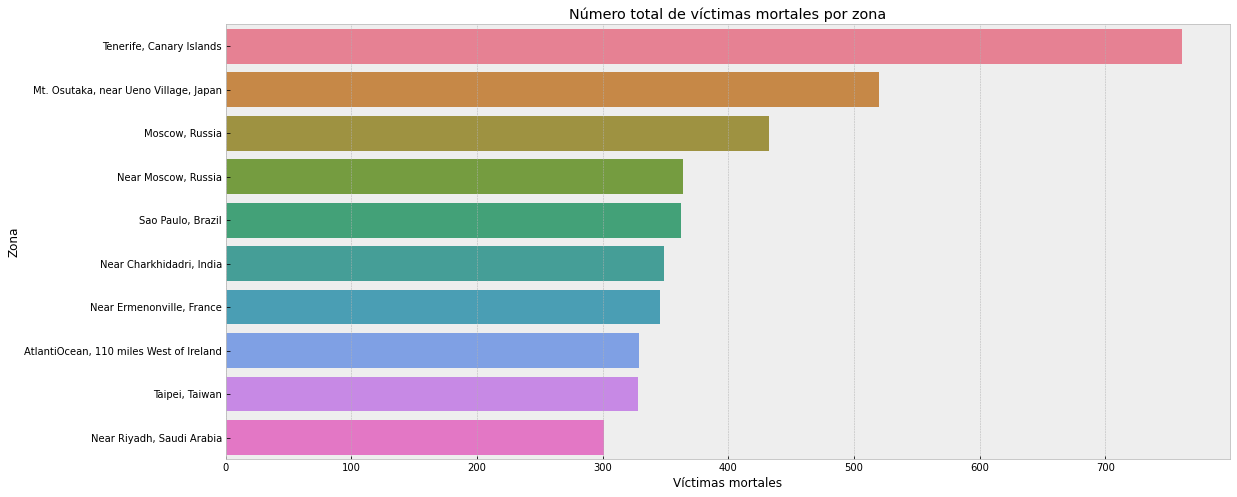

In [70]:
total_fat_by_zone = df.groupby('Location')[['Fatalities']].sum()
total_fat_by_zone = total_fat_by_zone.rename(columns={"Location": "Fatalities"})
total_fat_by_zone = total_fat_by_zone.sort_values(by='Fatalities', ascending=False).head(10)
print(total_fat_by_zone, "\n")

plt.figure(figsize=(18, 8))
sns.barplot(y=total_fat_by_zone.index, x="Fatalities", data=total_fat_by_zone, palette="husl")
plt.xlabel('Víctimas mortales')
plt.ylabel('Zona')
plt.title('Número total de víctimas mortales por zona')
plt.show()

Por otro lado, se puede observar que, poniendo el foco en el número de fallecidos en tierra, el lugar en el que se ha contabilizado el máximo número de víctimas mortales es Nueva York, pues el ataque al *World Trade Center* comentado anteriormente dio lugar a un gran número de fallecidos.

                              Ground
Location                            
New York City, New York       5500.0
Kinshasa, Zaire               225.0 
Arlington, Virginia.          125.0 
Santa Cruz, Bolivia           113.0 
Binh Tahi, Da Nang, Vietnam   107.0 
Ankara, Turkey                87.0  
Lviv, Ukraine                 85.0  
Kano, Nigeria                 75.0  
Maracaibo, Zulia, Venezuela   70.0  
Kaiserslautern, West Germany  70.0   



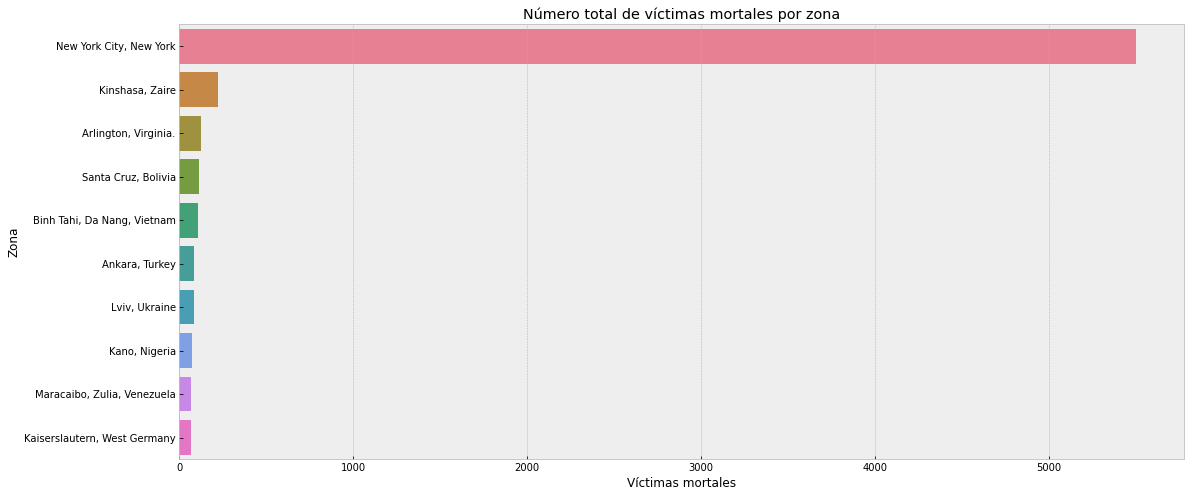

In [71]:
total_gr_by_zone = df.groupby('Location')[['Ground']].sum()
total_gr_by_zone = total_gr_by_zone.rename(columns={"Location": "Ground"})
total_gr_by_zone = total_gr_by_zone.sort_values(by='Ground', ascending=False).head(10)
print(total_gr_by_zone, "\n")

plt.figure(figsize=(18, 8))
sns.barplot(y=total_gr_by_zone.index, x="Ground", data=total_gr_by_zone, palette="husl")
plt.xlabel('Víctimas mortales')
plt.ylabel('Zona')
plt.title('Número total de víctimas mortales por zona')
plt.show()

### Modelado

#### Cálculo de Estacionariedad

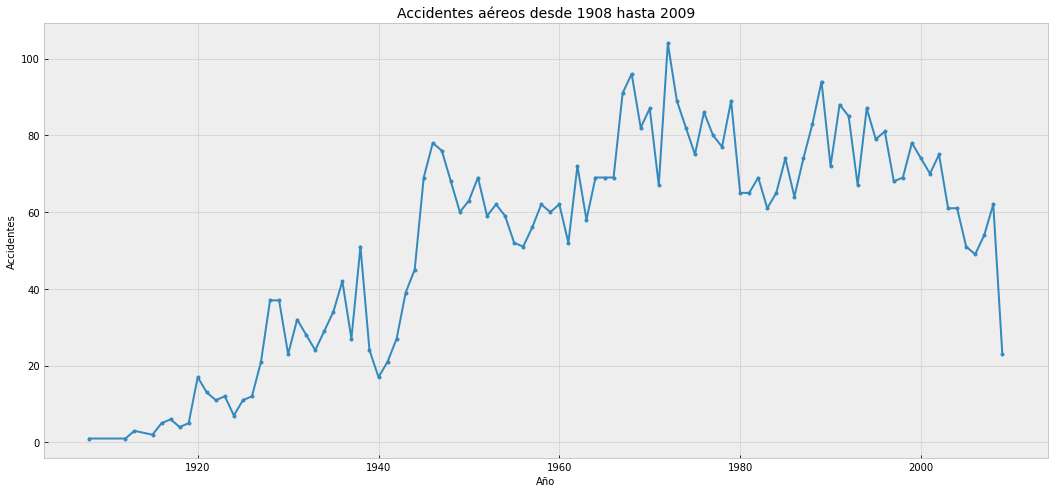

In [84]:
plt.figure(figsize=(18,8))
plt.plot(year_count.index, 'Count', data=year_count, marker = ".")
plt.xlabel('Año', fontsize=10)
plt.ylabel('Accidentes', fontsize=10)
plt.title('Accidentes aéreos desde 1908 hasta 2009', loc='Center', fontsize=14)
plt.show()

In [104]:
adf_test = ADFTest(alpha=0.5)
adf_test.should_diff(year_count)

#Se hace comprobación de que es estacionaria con el test de adfuller

(0.9699700450586958, True)

In [86]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries,label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

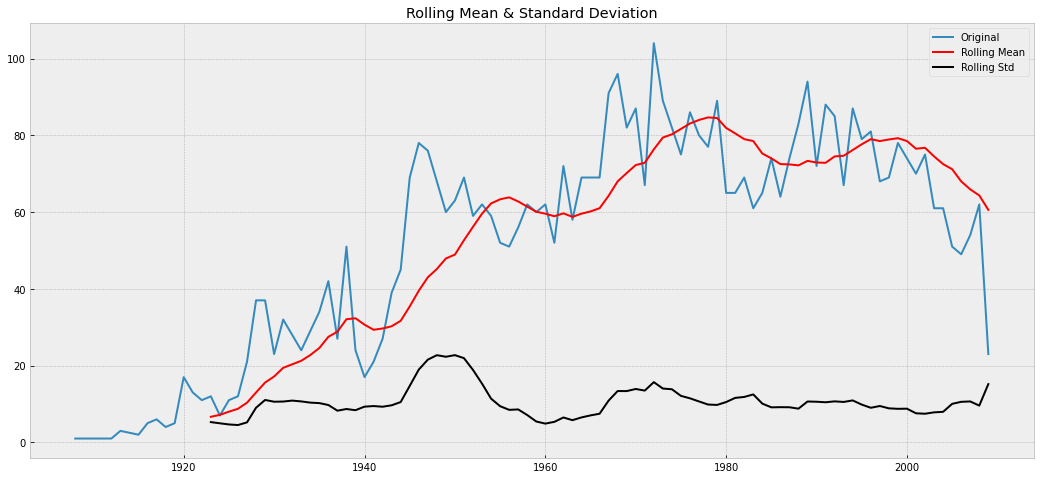

Results of Dickey-Fuller Test:
Test Statistic                -2.037814 
p-value                        0.270243 
#Lags Used                     1.000000 
Number of Observations Used    96.000000
Critical Value (1%)           -3.500379 
Critical Value (5%)           -2.892152 
Critical Value (10%)          -2.583100 
dtype: float64


In [87]:
#La serie temporal es estacionaria, puesto que se ve que no tiene tendencia ni estacionalidad
test_stationarity(year_count)

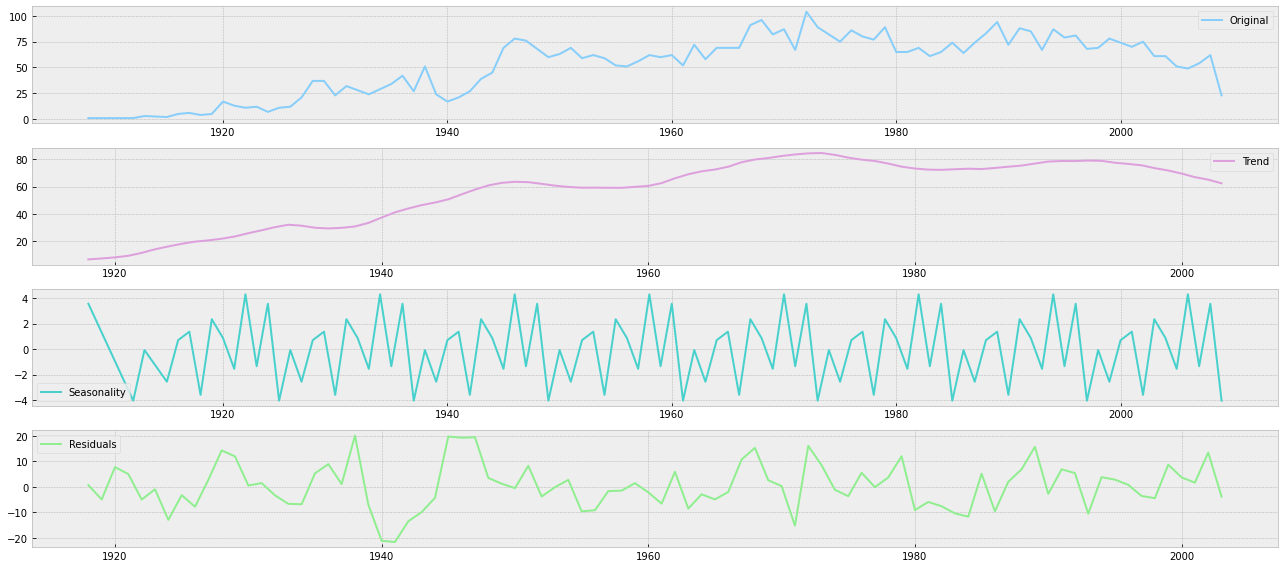

In [88]:
decomposition = seasonal_decompose(year_count, period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.rcParams['figure.figsize'] = (18, 8) 
plt.subplot(411)
plt.plot(year_count, label='Original', color="lightskyblue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="plum")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="mediumturquoise")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="lightgreen")
plt.legend(loc='best')
plt.tight_layout()

Se comprueba que no hay tendencia ni estacionalidad, por tanto, es estacionaria.

#### Función de Autocorrelación

In [91]:
lag_acf = acf(year_count, nlags=20)
lag_pacf = pacf(year_count, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

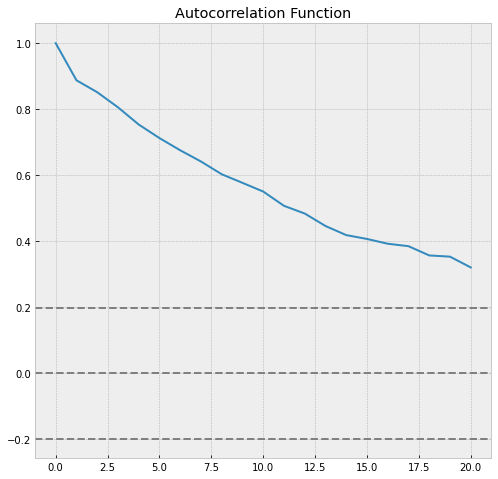

In [92]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(year_count)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(year_count)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

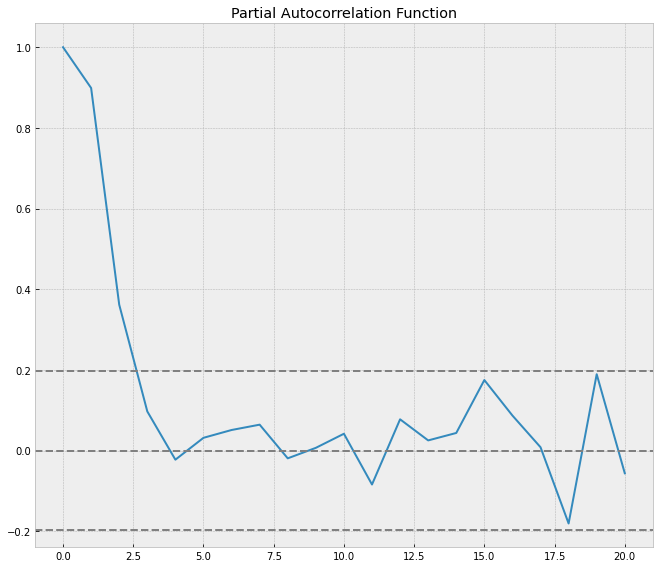

In [93]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(year_count)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(year_count)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#### ARIMA

##### AR Model

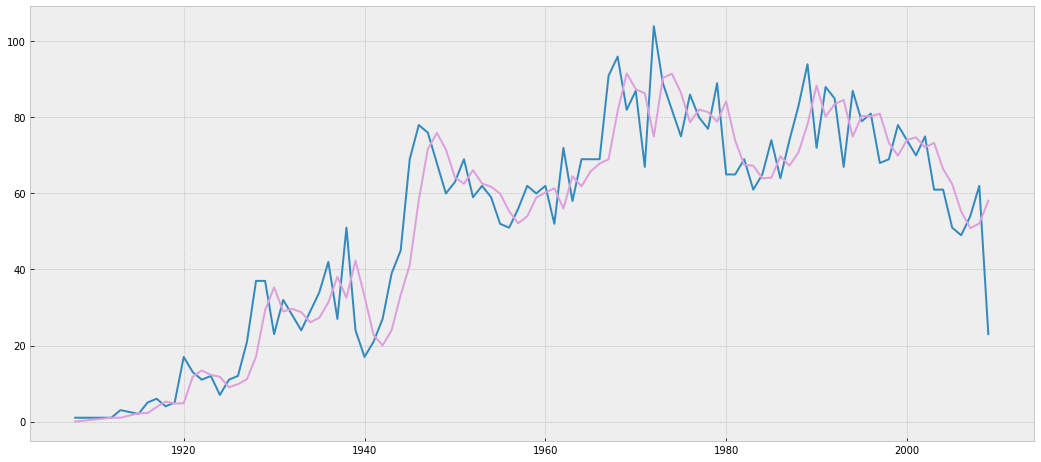

In [94]:
model = ARIMA(year_count, order=(2, 1, 0))  
results_AR = model.fit()  
plt.plot(year_count)
plt.plot(results_AR.fittedvalues, color='plum')

##### MA Model

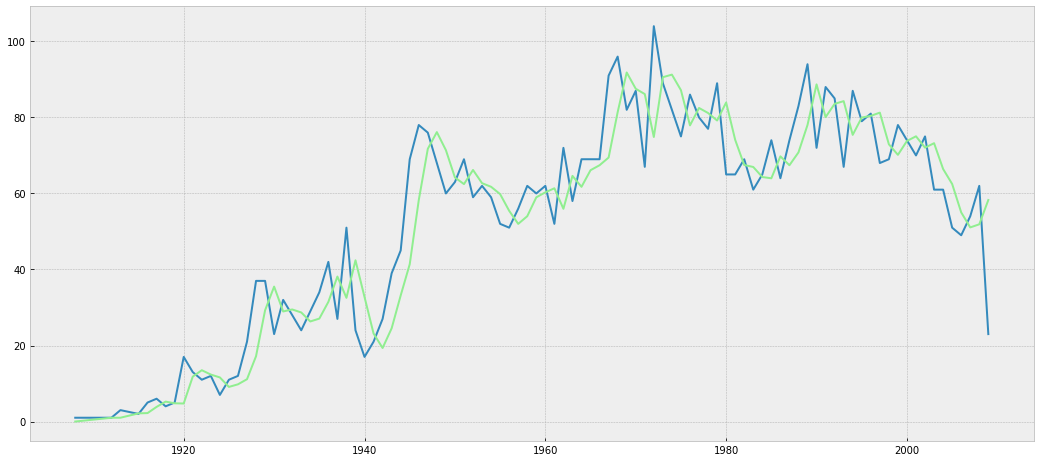

In [95]:
model = ARIMA(year_count, order=(2, 1, 2))  
results_ARIMA = model.fit()  
plt.plot(year_count)
plt.plot(results_ARIMA.fittedvalues, color='lightgreen')

##### Auto Arima

In [97]:
autoarima = auto_arima(year_count)
autoarima

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

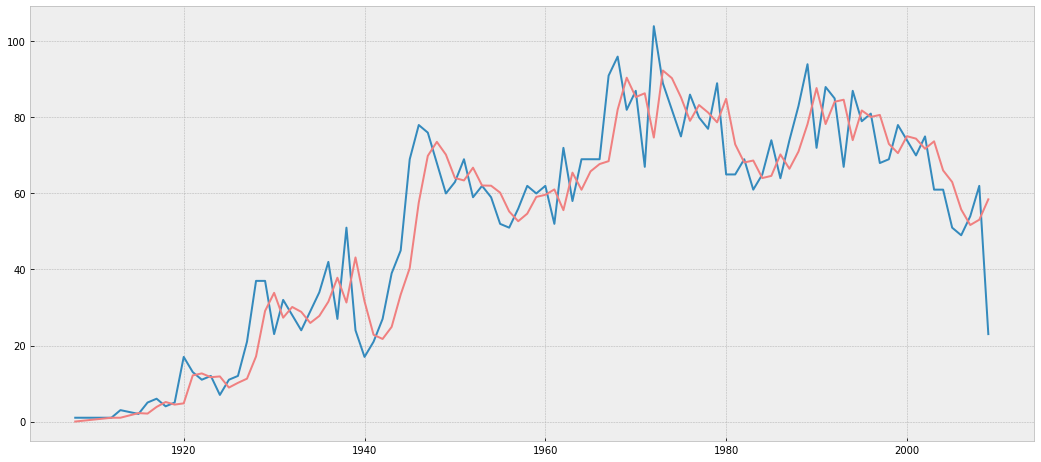

In [102]:
model = ARIMA(year_count, order=(0, 1, 1))  
results_ARIMA = model.fit()  
plt.plot(year_count)
plt.plot(results_ARIMA.fittedvalues, color='lightcoral')